In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
df = pd.read_csv('heart.csv')

In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

### Data Dictionary ¶
- age: age in years
- sex: sex
  - 1 = male
  - 0 = female
- cp: chest pain type
   - Value 0: typical angina
   - Value 1: atypical angina
   - Value 2: non-anginal pain
   - Value 3: asymptomatic
- trestbps: resting blood pressure (in mm Hg on admission to the hospital)- 
- chol: serum cholestoral in mg/dl
- fbs: (fasting blood sugar > 120 mg/dl)
   - 1 = true;
   - 0 = false
- restecg: resting electrocardiographic results
   - Value 0: normal
   - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or    depression of > 0.05 mV)
   - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
- thalach: maximum heart rate achieved
- exang: exercise induced angina
    - 1 = yes
    - 0 = no
- oldpeak = ST depression induced by exercise relative to rest
- slope: the slope of the peak exercise ST segment
    - Value 0: upsloping
    - Value 1: flat
    - Value 2: downsloping
- ca: number of major vessels (0-3) colored by flourosopy
- thal:
    - 0 = error (in the original dataset 0 maps to NaN's)
    - 1 = fixed defect
    - 2 = normal
    - 3 = reversable defect
- target (the lable):
    - 0 = no disease,
    - 1 = disease

In [8]:
df.shape

(303, 14)

In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [20]:
df['target'].value_counts(normalize=True)*100

target
1    54.455446
0    45.544554
Name: proportion, dtype: float64

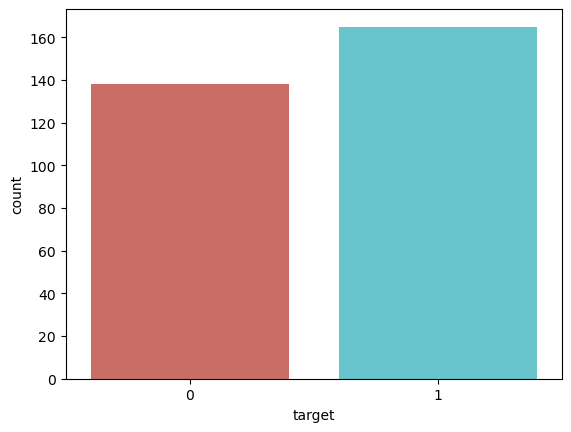

In [27]:
sns.countplot(x ='target',data=df,palette='hls')
plt.show()

<Axes: xlabel='age'>

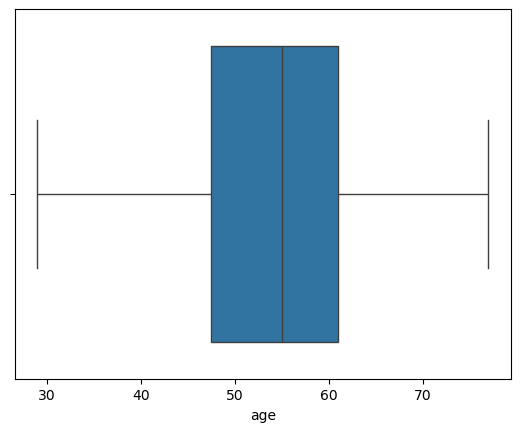

In [28]:
sns.boxplot(data =df,x= 'age')

In [30]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [34]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [36]:
X = df.drop('target',axis =1)
y = df['target']

In [37]:
X.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2


In [38]:
y.head(2)

0    1
1    1
Name: target, dtype: int64

In [39]:
#splitting the data 
from sklearn.model_selection import train_test_split

In [49]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [55]:
print(f"X_Train :Shape: {X_train.shape}")
print(f"y_train :Shape: {y_train.shape}")

print("--"*30)

print(f"X_Test :Shape: {X_test.shape}")
print(f"y_test :Shape: {y_test.shape}")

X_Train :Shape: (242, 13)
y_train :Shape: (242,)
------------------------------------------------------------
X_Test :Shape: (61, 13)
y_test :Shape: (61,)


In [50]:
#fit the model / Build the model
from sklearn.linear_model import LogisticRegression

In [51]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [52]:
y_pred = model.predict(X_test)

In [53]:
y_pred

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1])

In [ ]:
#Evaluation matrics here we use confusion matics 

In [60]:
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay

In [57]:
confusion_matrix(y_test,y_pred)

array([[20, 10],
       [ 4, 27]])

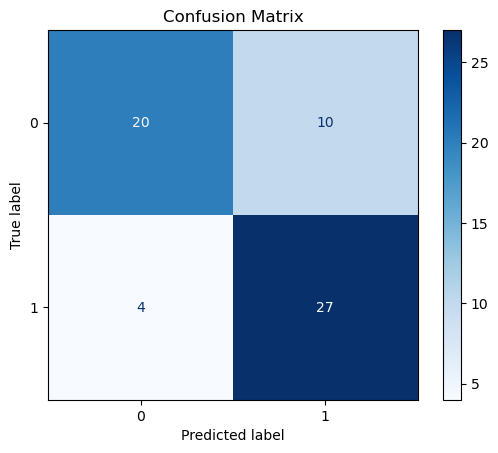

In [61]:
cm = confusion_matrix(y_test, y_pred)  # get confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)           # optional color map
plt.title("Confusion Matrix")
plt.show()

In [62]:
print("Classification Report : ",classification_report(y_test,y_pred))

Classification Report :                precision    recall  f1-score   support

           0       0.83      0.67      0.74        30
           1       0.73      0.87      0.79        31

    accuracy                           0.77        61
   macro avg       0.78      0.77      0.77        61
weighted avg       0.78      0.77      0.77        61

